#                                      Concrete Strength 

This case study is to determine the factors (inputs) that have correlation to the concrete compressive strength (output). Use visualization and exploration to gain an understanding of the data and make decisions about how it can be applied to predict strength. Use the data to determine data diversity, relationships, missing data, bad data, and factors that are important for regression. 

#### Does cement mean concrete?
Even construction professionals sometimes incorrectly use the terms cement and concrete interchangeably. Cement is actually an ingredient of concrete. It is the fine powder that, when mixed with water, sand, and gravel or crushed stone (fine and coarse aggregate), forms the rock-like mass known as concrete.

#### Concrete aggregates(granulaire) 
are composed of geological materials such as gravel, sand and crushed rock. The size of the particles determines whether it is a coarse aggregate (e.g. gravel) or a fine aggregate (e.g. sand). The resulting concrete can be used in its natural state or crushed, according to its use and application.

#### Aggregate materials
help to make concrete mixes more compact. They also decrease the consumption of cement and water and contribute to the mechanical strength of the concrete, making them an indispensable ingredient in the construction and maintenance of rigid structures.

#### Slag:
(en fr Laitier)  En métallurgie, les scories sont des sous-produits solides issus de la fusion, de l'affinage, du traitement ou de la mise en forme des métaux à haute température. Ce sont des mélanges d'oxydes divers qui surnagent sur le métal en fusion, ou s'en détachent lors de leur mise en œuvre à haute température

#### Flyash : 
(en fr Cendre volante ) La cendre volante, parfois dénommée PFA, est l’un des trois déchets issus de la combustion du charbon dans les grandes chaudières industrielles et dans les chaudières de centrales électriques au charbon. Ensemble avec cendres enlevé du fond de la chaudière elles constituent ce qu’on appelle la cendre de charbon

#### Superplasticize :  
Un superplastifiant ou haut réducteur d’eau est un adjuvant pour matériaux cimentaires tels que les coulis, les mortiers de ciment et les bétons de ciment. Il est utilisé pour diminuer la quantité d’eau qu’ils contiennent à l’état frais et ainsi augmenter leur résistance mécanique à l’état durci

#### coarseaggregate :
Coarse aggregate is stone which are broken into small sizes and irregular in shape. In construction work the aggregate are used such as limestone and granite or river aggregate.The coarse aggregate has a major effect on concrete properties such as abrasion resistance, hardness, elastic modulus, and another characteristic like durability, strong, and cheaper. Other applications of coarse aggregate are to backfills, fills, drainage, and filtration work.

#### Fine aggregate
Fills voids between aggregates. It forms the bulk and makes mortar or concrete economical. It provides resistance against shrinking and cracking. It is naturally available.

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns 
import numpy as np

In [30]:
data = pd.read_csv('cement_strength.txt')
data.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

## Pair plot 

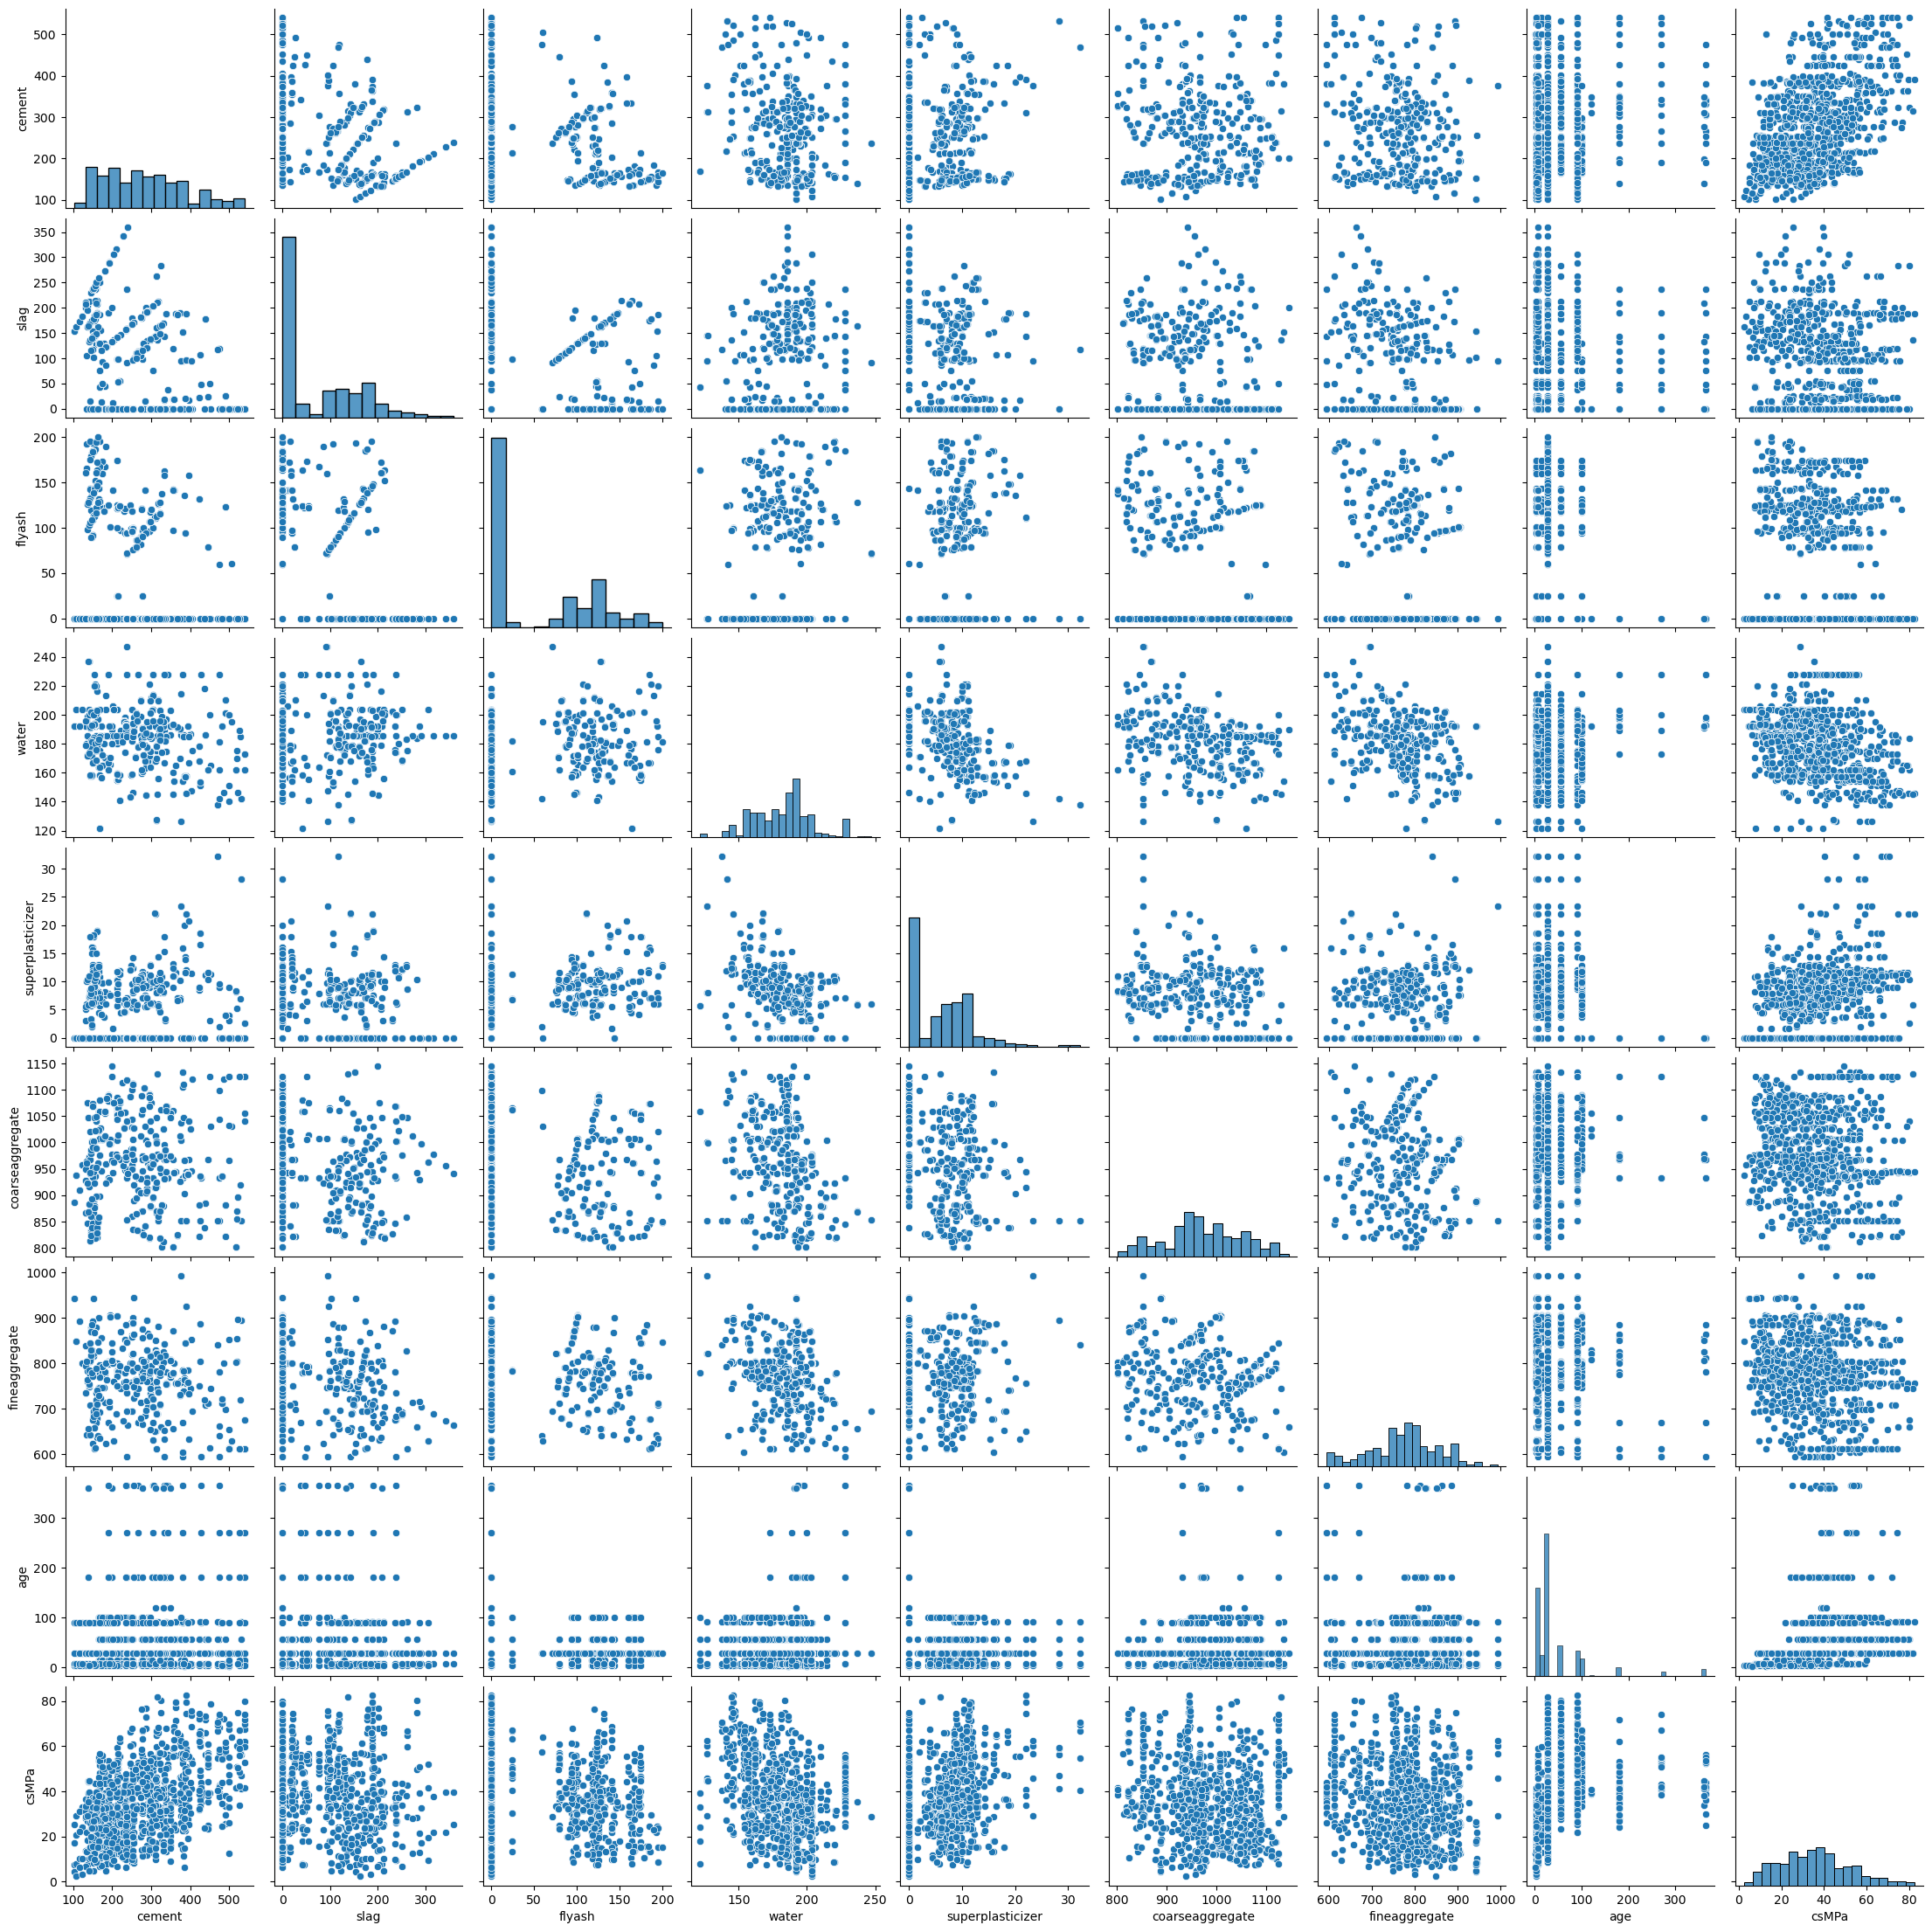

In [5]:
sns.pairplot(data)

## Divide data between high and low  strength

In [31]:
data['strength'] = np.where(data['csMPa']>= 44 , 'high' ,'low')
data.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa strength  
0          676.0   28  79.99     high  
1          676.0   28  61.89     high  
2          594.0  270  40.27      low  
3          594.0  365  41.05      low  
4          825.5  360  44.30     high

# Part 1 : Data visualisation and cleansing 

Concrete strength is affected by factors such as water to cement ratio, raw material quality, the ratio of coarse or fine aggregate, concrete age, concrete compaction, temperature, relative humidity, and other factors during the curing of the concrete. The data includes the following information for 1030 concrete samples.

Input variables:
* Cement: kg/m mixture
* Blast Furnace Slag: kg/m mixture
* Fly Ash: kg/m mixture
* Water: kg/m mixture
* Superplasticizer: kg/m mixture
* Coarse Aggregate: kg/m mixture
* Fine Aggregate: kg/m mixture
* Age: Day (1~365)
* Output variable:
* Concrete compressive strength: MPa

In [15]:
data.describe()

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     7.000000    23.710000  
50%         968.000000     779.500000    28.000000    34.445000  
75%        1029.400000     824.000000    56.000000    46.135000  
max        1145.000000     992.600000   365.000000    82.600000

In [18]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data , explorative = True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<BarContainer object of 2 artists>

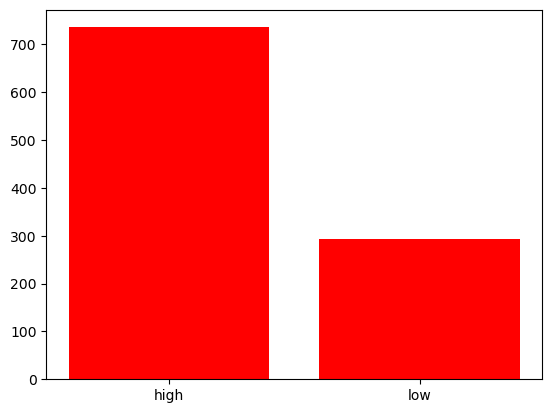

In [24]:
plt.bar(x=['high','low'] , height = data['strength'].value_counts() , color = 'r')

##  Converting string categories (text) to binaries (0 or 1 )

In [25]:
data.dtypes 

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
strength             object
dtype: object

In [32]:
data.strength = [0 if i == 'low' else 1  for i in data.strength ]
data.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  strength  
0          676.0   28  79.99         1  
1          676.0   28  61.89         1  
2          594.0  270  40.27         0  
3          594.0  365  41.05         0  
4          825.5  360  44.30         1

##  Data cleansing 

cement                 AxesSubplot(0.125,0.53;0.133621x0.35)
slag                AxesSubplot(0.285345,0.53;0.133621x0.35)
flyash               AxesSubplot(0.44569,0.53;0.133621x0.35)
water               AxesSubplot(0.606034,0.53;0.133621x0.35)
superplasticizer    AxesSubplot(0.766379,0.53;0.133621x0.35)
coarseaggregate        AxesSubplot(0.125,0.11;0.133621x0.35)
fineaggregate       AxesSubplot(0.285345,0.11;0.133621x0.35)
age                  AxesSubplot(0.44569,0.11;0.133621x0.35)
csMPa               AxesSubplot(0.606034,0.11;0.133621x0.35)
strength            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

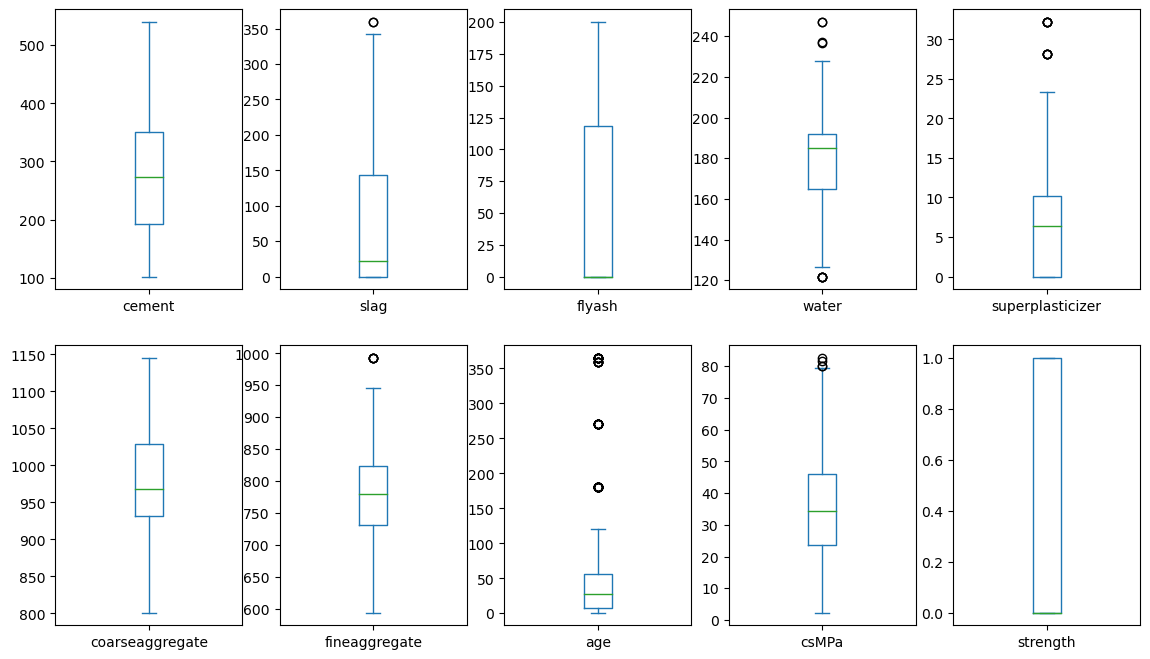

In [36]:
data.plot(kind = 'box' ,subplots = True , layout = (2,5)  , figsize =(14, 8))

In [44]:
outliers = data.loc[(data['fineaggregate']>950) | (data['slag']>350)]
outliers

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
74    375.0   93.8     0.0  126.6              23.4            852.1   
97    375.0   93.8     0.0  126.6              23.4            852.1   
120   375.0   93.8     0.0  126.6              23.4            852.1   
143   375.0   93.8     0.0  126.6              23.4            852.1   
166   375.0   93.8     0.0  126.6              23.4            852.1   
553   239.6  359.4     0.0  185.7               0.0            941.6   
559   239.6  359.4     0.0  185.7               0.0            941.6   

     fineaggregate  age  csMPa  strength  
74           992.6    3  29.00         0  
97           992.6    7  45.70         1  
120          992.6   28  56.70         1  
143          992.6   56  60.20         1  
166          992.6   91  62.50         1  
553          664.3    7  25.42         0  
559          664.3   28  39.44         0

In [48]:
data = data[(data['fineaggregate']<950) & (data['slag']<350)]
len(data)

1023

cement                 AxesSubplot(0.125,0.53;0.133621x0.35)
slag                AxesSubplot(0.285345,0.53;0.133621x0.35)
flyash               AxesSubplot(0.44569,0.53;0.133621x0.35)
water               AxesSubplot(0.606034,0.53;0.133621x0.35)
superplasticizer    AxesSubplot(0.766379,0.53;0.133621x0.35)
coarseaggregate        AxesSubplot(0.125,0.11;0.133621x0.35)
fineaggregate       AxesSubplot(0.285345,0.11;0.133621x0.35)
age                  AxesSubplot(0.44569,0.11;0.133621x0.35)
csMPa               AxesSubplot(0.606034,0.11;0.133621x0.35)
strength            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

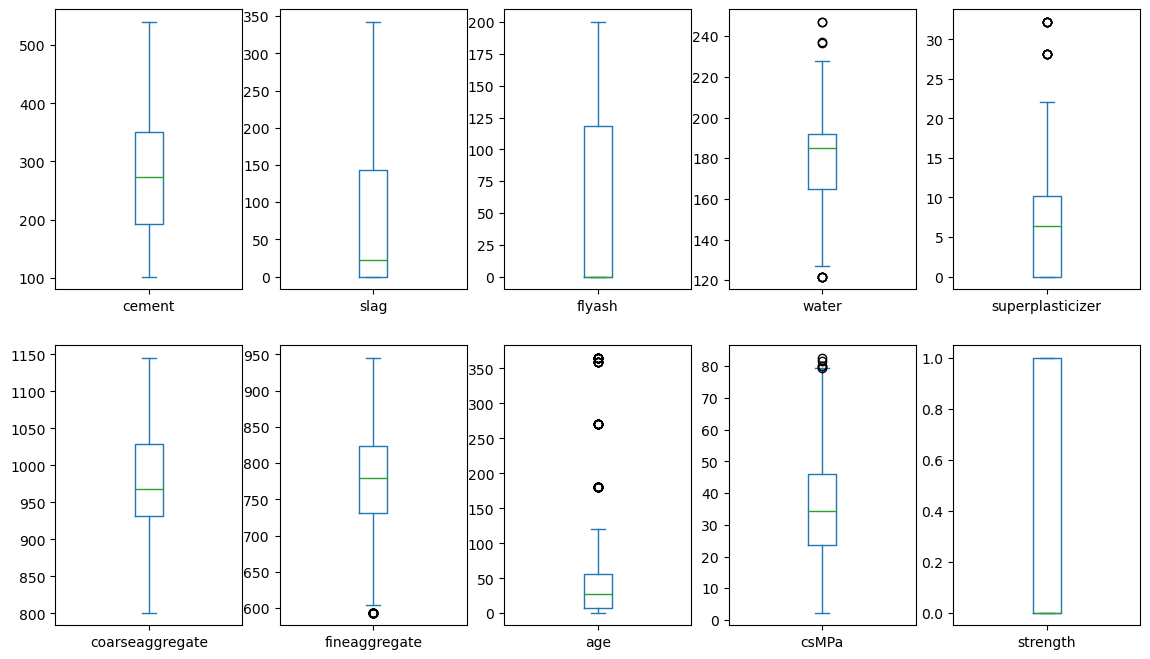

In [49]:
data.plot(kind = 'box' ,subplots = True , layout = (2,5)  , figsize =(14, 8))

##  Data correlation 

<AxesSubplot:>

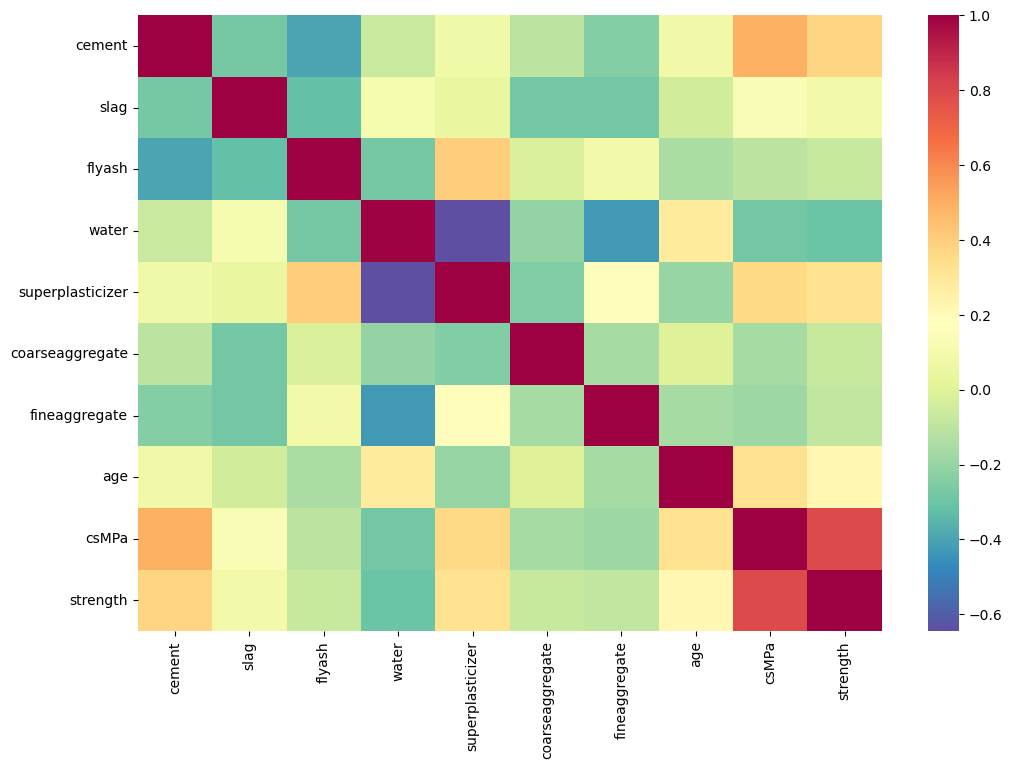

In [60]:
plt.figure(figsize = (12,8))
ax= plt.gca()
sns.heatmap(data.corr() , cmap = cm.Spectral_r , ax =ax)

##  Data distibution and pair plot 

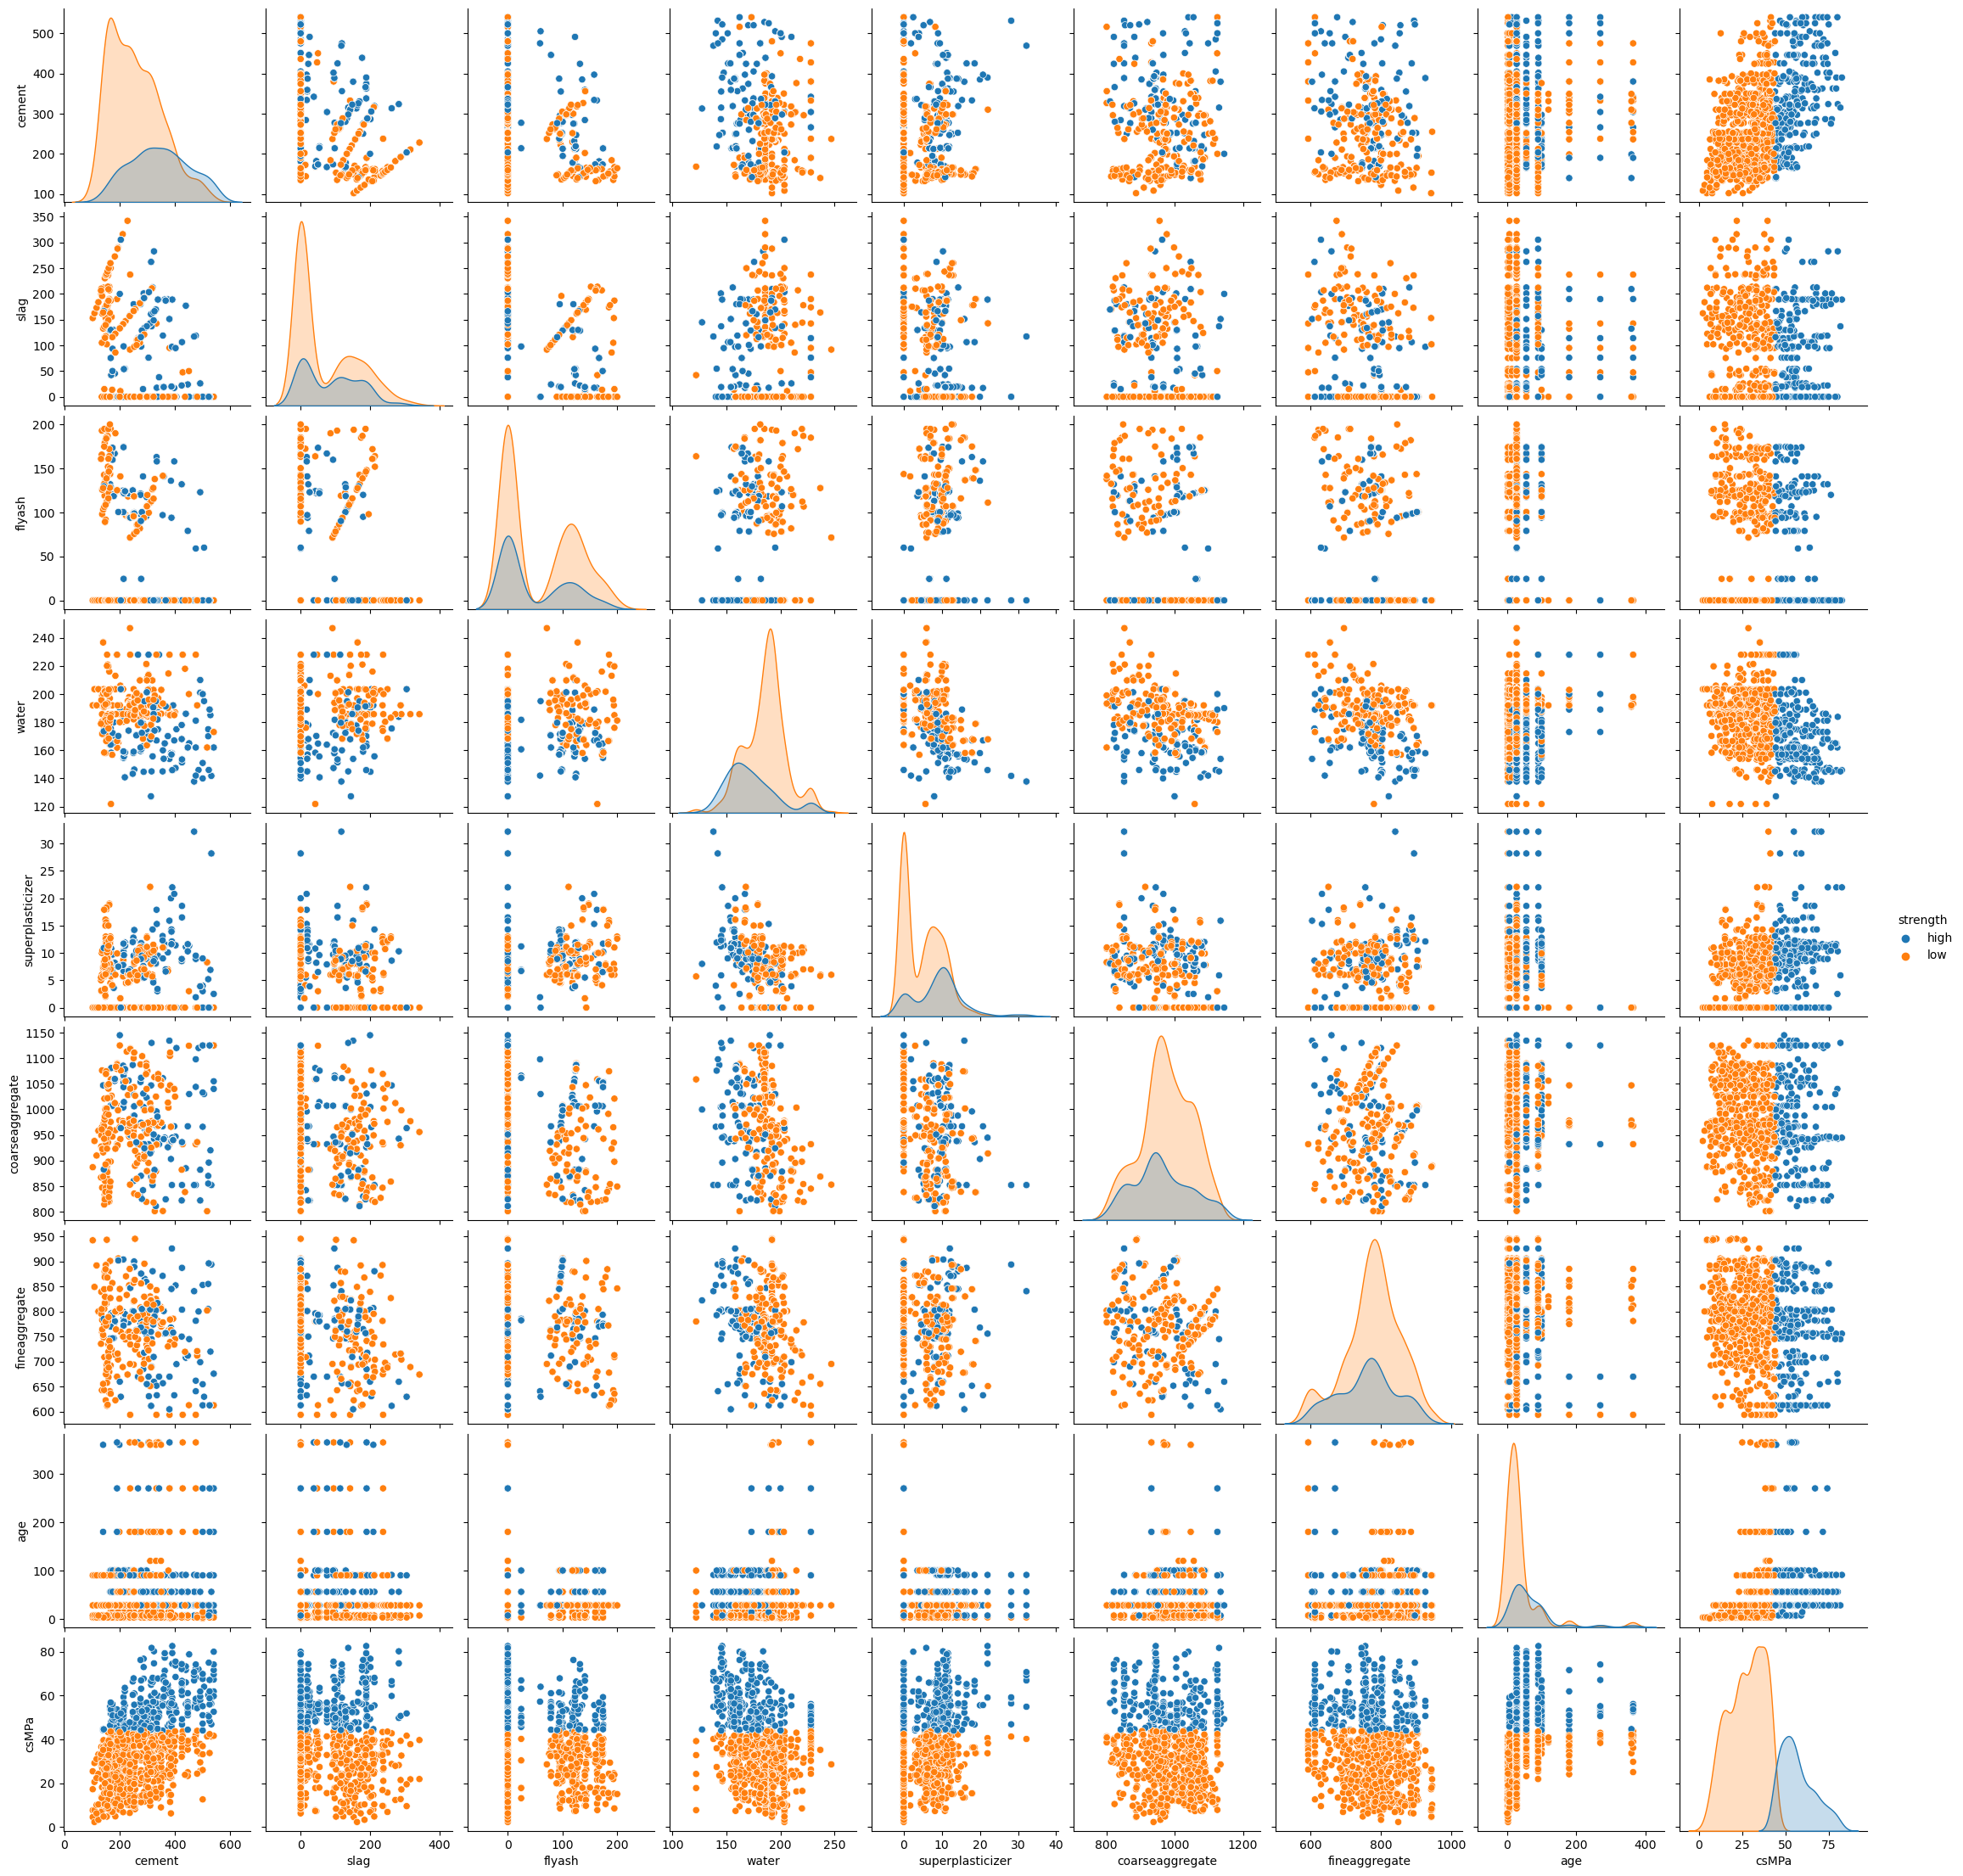

In [62]:
dpair = data.copy()
dpair['strength'] = np.where(dpair.strength == 1 , 'high' , 'low' ) 
sns.pairplot(dpair , hue='strength')

#  Classification  to predict Strength (High or Low)

In [66]:
label = 'strength'
x_names = list(data.columns)
x_names.remove('csMPa')
x_names.remove('strength')
x_names 

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [67]:
X = data[x_names].copy()
y = data[label].copy()

##  Data scaling 

In [70]:
from sklearn.preprocessing import StandardScaler

s= StandardScaler()
Xs = s.fit_transform(X)
Xs = pd.DataFrame(Xs , columns = X.columns)
Xs.head(5)


cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0  2.478337 -0.855688 -0.852132 -0.941192         -0.619644         0.857067   
1  2.478337 -0.855688 -0.852132 -0.941192         -0.619644         1.050596   
2  0.494401  0.809180 -0.852132  2.191706         -1.046073        -0.536342   
3  0.494401  0.809180 -0.852132  2.191706         -1.046073        -0.536342   
4 -0.785835  0.691178 -0.852132  0.482853         -1.046073         0.062308   

   fineaggregate       age  
0      -1.227664 -0.280578  
1      -1.227664 -0.280578  
2      -2.268448  3.542717  
3      -2.268448  5.043597  
4       0.669863  4.964603

##  Train Test Split 

In [72]:
from sklearn.model_selection import train_test_split as tts

x_train , x_test , y_train , y_test  =  tts(Xs , y , test_size = 0.2 ,shuffle = True , random_state = 42) 
print(len(x_train) , len(y_train))

818 818


In [75]:
from sklearn.feature_selection import SelectKBest , f_classif , f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import statsmodels.api as sm

<AxesSubplot:xlabel='Features'>

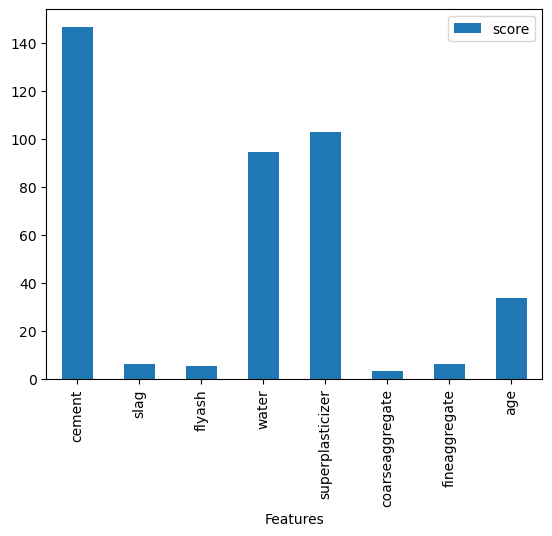

In [80]:
skb = SelectKBest(f_classif , k='all')
fit = skb.fit(x_train , y_train)
scores = pd.DataFrame({'Features' : x_train.columns , 'score':fit.scores_})
scores = scores.set_index('Features' ,drop=True)
scores.plot(kind='bar')

In [82]:
scores.T

Features      cement      slag    flyash      water  superplasticizer  \
score     146.591682  6.096837  5.471682  94.330275        102.696406   

Features  coarseaggregate  fineaggregate        age  
score            3.132258       6.132877  33.445261

In [83]:
nb = GaussianNB()
lr = LogisticRegression()
sgd = SGDClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rfm = RandomForestClassifier()
sv = SVC()
nn = MLPClassifier(max_iter=2000)

clsfrs = [[nb,'Naive Bayes'] , [dt , 'Decision Tree'] ,[knn , 'K Nearest Neighbors'] , 
          [sv , 'Support Vector Machine'] , [lr , 'Logistic Regression'] , 
          [sgd , 'Stochastic Gradient Descent'] , [rfm , 'Random Forest Classifier'] ,
          [nn , 'Neural Network']]

         
for clf , name  in clsfrs:    
         clf.fit(x_train , y_train)


###  Classifier Evaluation

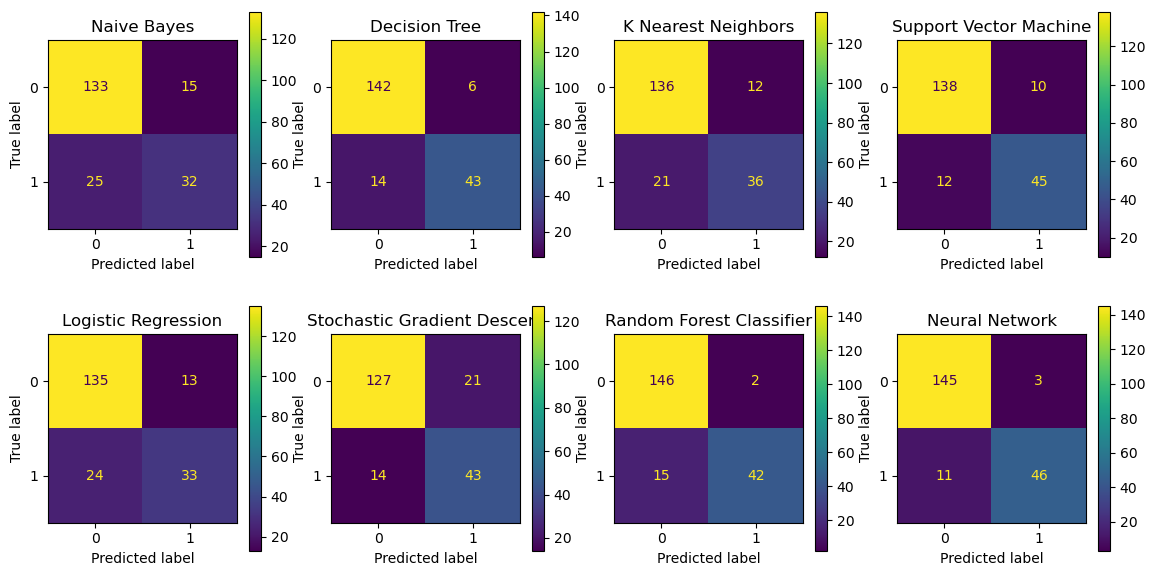

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
i = 0 
plt.figure(figsize=(14,7))

for clf , name in clsfrs:
    i+=1
    ax = plt.subplot(2,4,i)
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test , ax =ax)
    plt.title(name)
    


## Part 3 :  Regression  to predict csMPA

### Scale Data  

In [113]:
s = StandardScaler()
ds = s.fit_transform(data)
ds = pd.DataFrame(ds , columns=data.columns)
ds.describe()

cement          slag        flyash         water  \
count  1.023000e+03  1.023000e+03  1.023000e+03  1.023000e+03   
mean   1.502003e-16  3.498342e-16  1.504282e-15  9.354958e-16   
std    1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00   
min   -1.709441e+00 -8.556878e-01 -8.521322e-01 -2.849411e+00   
25%   -8.489383e-01 -8.556878e-01 -8.521322e-01 -8.035340e-01   
50%   -7.639844e-02 -5.986556e-01 -8.521322e-01  1.505756e-01   
75%    6.617213e-01  8.138529e-01  9.955369e-01  4.828526e-01   
max    2.478337e+00  3.141162e+00  2.273131e+00  3.093600e+00   

       superplasticizer  coarseaggregate  fineaggregate           age  \
count      1.023000e+03     1.023000e+03   1.023000e+03  1.023000e+03   
mean      -2.810829e-16    -6.704749e-16  -2.970633e-16  2.435328e-16   
std        1.000489e+00     1.000489e+00   1.000489e+00  1.000489e+00   
min       -1.046073e+00    -2.226496e+00  -2.268448e+00 -7.071442e-01   
25%       -1.046073e+00    -5.363423e-01  -5.232308e-01 -6.123517e-01   
50%        4.558584e-02    -7.187250e-02   8.347017e-02 -2.805782e-01   
75%        6.852299e-01     7.203065e-01   6.394012e-01  1.617865e-01   
max        4.446337e+00     2.211771e+00   2.186616e+00  5.043597e+00   

              csMPa      strength  
count  1.023000e+03  1.023000e+03  
mean  -8.899148e-17  1.015154e-15  
std    1.000489e+00  1.000489e+00  
min   -2.001770e+00 -6.289947e-01  
25%   -7.239080e-01 -6.289947e-01  
50%   -8.752239e-02 -6.289947e-01  
75%    6.090578e-01  1.589838e+00  
max    2.806011e+00  1.589838e+00

In [114]:
y_name = 'csMPa'
X_names = list(data.columns)[0:8]
Xs = ds[X_names].copy()
ys = ds[y_name].copy()

###  Select Best Features for regression 

In [115]:
x_train , x_test , y_train , y_test  =  tts(Xs , ys , test_size = 0.2 ,shuffle = True , random_state = 42) 
print(len(x_train) , len(y_train))

818 818


<AxesSubplot:xlabel='Features'>

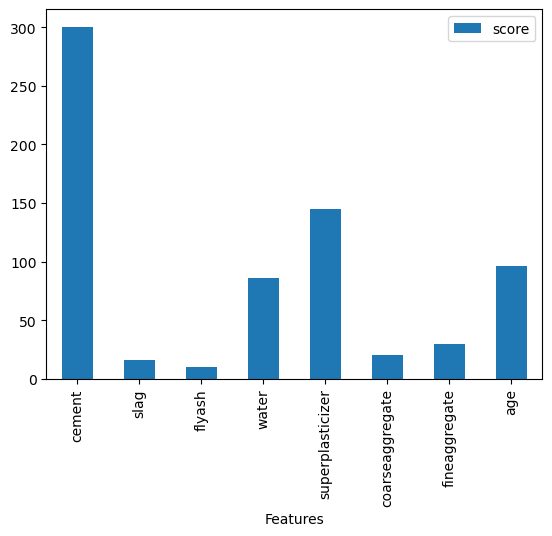

In [116]:
skb = SelectKBest(f_regression , k='all')
fit = skb.fit(x_train , y_train)
scores = pd.DataFrame({'Features' : Xs.columns , 'score':fit.scores_})
scores = scores.set_index('Features' ,drop=True)
scores.plot(kind='bar')

In [118]:
lin = LinearRegression()
sv = svm.SVR()
knn = KNeighborsRegressor(n_neighbors = 2)
nn = MLPRegressor(hidden_layer_sizes = (3,5,3) , tol =1e-6 , 
                 activation = 'tanh' , solver='lbfgs' , 
                 early_stopping = True , max_iter=10000,
                 n_iter_no_change = 20)

regress = [[lin , 'Linear Regression'] , 
           [sv , 'Support Vector Regressor'],
           [knn , 'k-Nearest Neighbors'] , 
           [nn , 'Neural Network']]

for method , name in regress : 
    method.fit(x_train , y_train)

###  Validation 

In [119]:
for method , name in regress:
    r2 = method.score(x_train,y_train)
    print(r2)

0.6301106865099024
0.8878971703791279
0.9264164505696022
0.9048442496955564


In [120]:
for method , name in regress :
    r2 = method.score(x_test , y_test)
    print(r2)

0.54977851634022
0.8206968387062005
0.635195801365698
0.8540063604018503


###  Parity plot

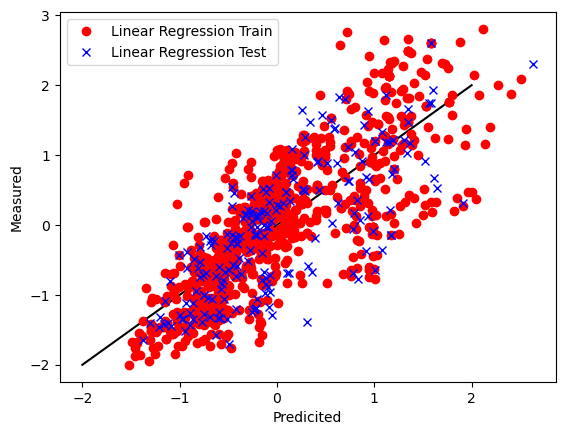

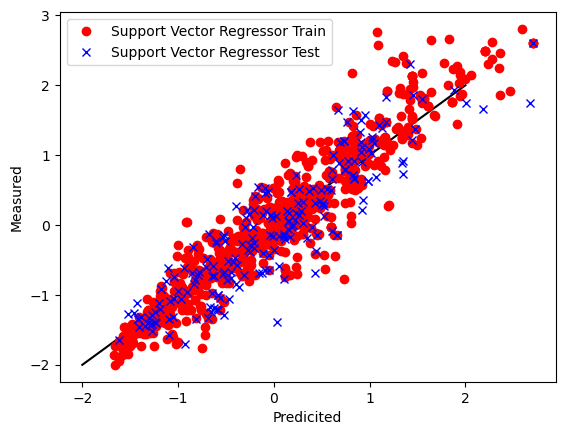

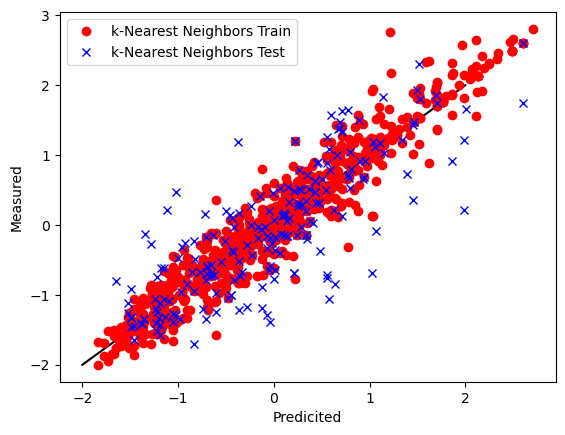

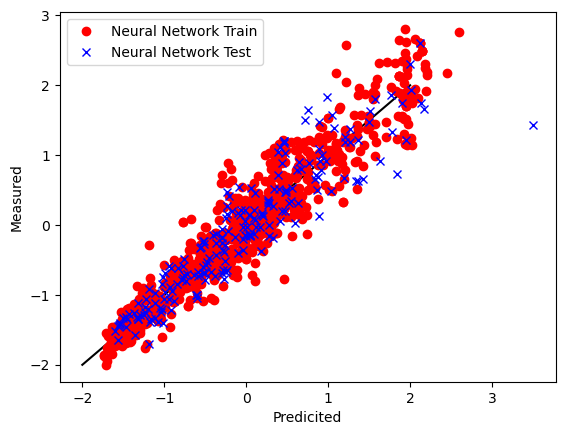

In [126]:

for method , name in regress:
    plt.figure()
    plt.plot([-2,2] , [-2,2] , 'k-')
    plt.plot(method.predict(x_train), y_train , 'ro' , label=name+' Train')
    plt.plot(method.predict(x_test), y_test , 'bx' , label=name+' Test')
    plt.xlabel('Predicited')
    plt.ylabel('Measured')
    plt.legend()

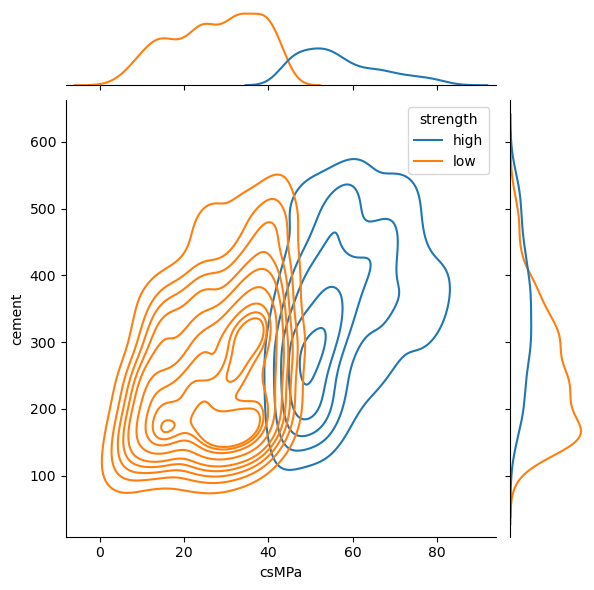

In [127]:
sns.jointplot(y='cement' , x='csMPa' , data=dpair , kind='kde' , hue ='strength')